# Task 1 - Exploratory Data Analysis

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns

In [2]:
# load the data
df =  pd.read_excel('churn-data.xlsx')

In [3]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


## Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [5]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


#### 75% customers have subscription length less than 19 months
#### Average monthly bill is $ 65
#### Average data usage is 274 gb

In [6]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [7]:
# Check if the data is imbalanced or not
df['Churn'].value_counts()[1]/df.shape[0]

0.49779

#### Data is fairly balanced, ratio = 51:49

In [8]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

#### There are no missing values

#### Grouping the age in groups of 4 years

In [9]:
labels = [f"{i}-{i+4}" for i in range(18, 70, 4)]
df['Age-group'] = pd.cut(df.Age, range(18,74, 4), right = False, labels = labels)

In [10]:
df['Age-group'].value_counts()

38-42    7675
50-54    7644
30-34    7632
58-62    7617
54-58    7610
26-30    7564
18-22    7563
42-46    7536
66-70    7495
62-66    7490
46-50    7461
22-26    7421
34-38    7371
Name: Age-group, dtype: int64

## Data Visualisations

<Axes: xlabel='Gender', ylabel='count'>

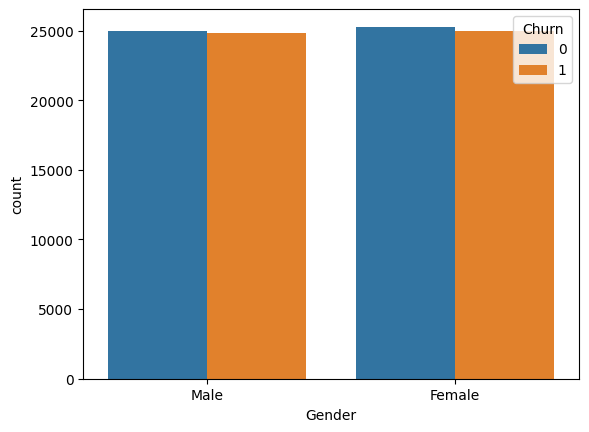

In [11]:
sns.countplot(data = df, x = 'Gender', hue = 'Churn')

<Axes: xlabel='Location', ylabel='count'>

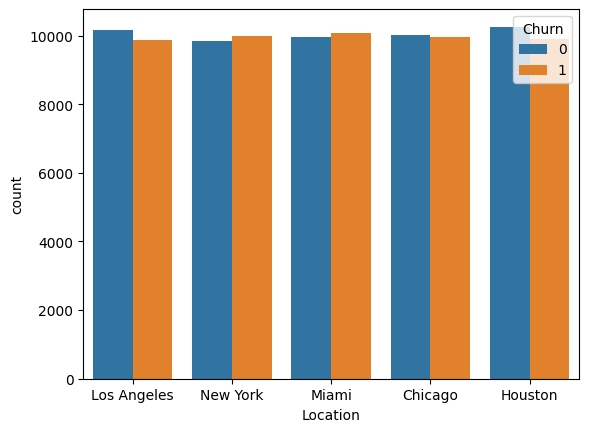

In [12]:
sns.countplot(data = df, x = 'Location', hue = 'Churn')

<Axes: xlabel='Age-group', ylabel='count'>

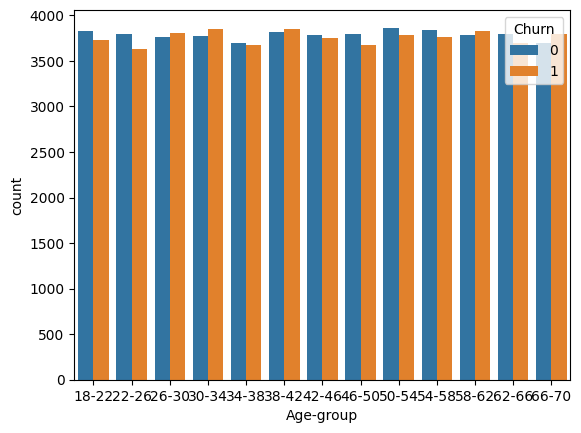

In [13]:
sns.countplot(data = df, x = 'Age-group', hue = 'Churn')

<ipython-input-14-9747fc819598>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


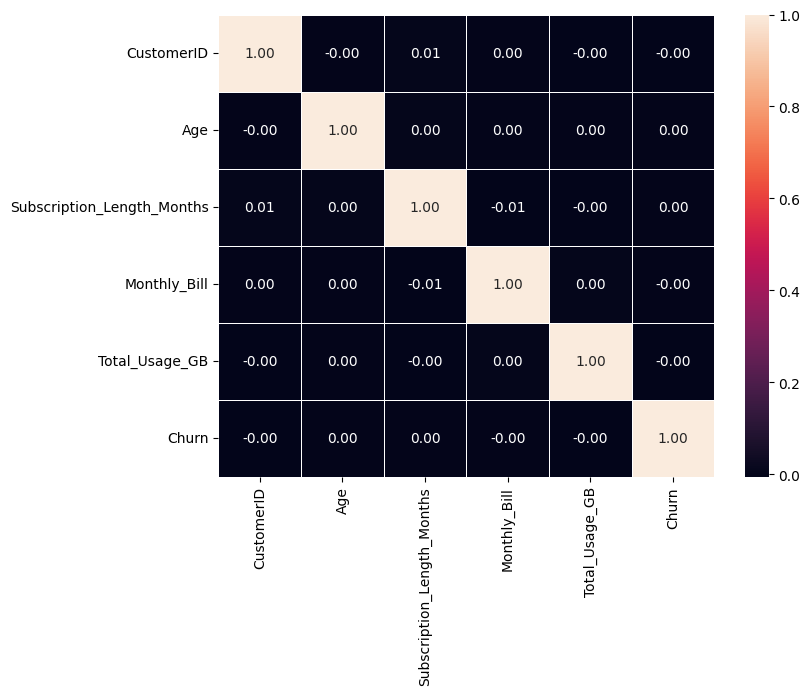

In [14]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

<ipython-input-15-cd4b95bf891f>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mb = sns.kdeplot(df.Monthly_Bill[(df['Churn'] == 0)], color = 'Red', shade = True)
<ipython-input-15-cd4b95bf891f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mb = sns.kdeplot(df.Monthly_Bill[(df['Churn'] == 1)], ax = mb, color = 'Blue', shade = True)


Text(0.5, 1.0, 'Monthly Bill by churn')

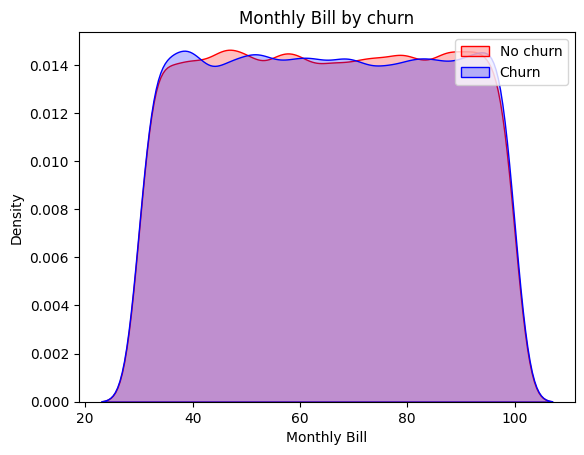

In [15]:
mb = sns.kdeplot(df.Monthly_Bill[(df['Churn'] == 0)], color = 'Red', shade = True)
mb = sns.kdeplot(df.Monthly_Bill[(df['Churn'] == 1)], ax = mb, color = 'Blue', shade = True)
mb.legend(['No churn', 'Churn'], loc = 'upper right')
mb.set_xlabel('Monthly Bill')
mb.set_ylabel('Density')
mb.set_title('Monthly Bill by churn')

# Task 2 - Data Preprocessing

In [16]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age-group
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,62-66
1,2,Customer_2,62,Female,New York,1,48.76,172,0,62-66
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,22-26
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,34-38
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,46-50
...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,30-34
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0,62-66
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1,62-66
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1,50-54


In [17]:
# Drop unnecessary columns
df.drop(columns = ['CustomerID', 'Name', 'Age-group'], inplace = True)
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


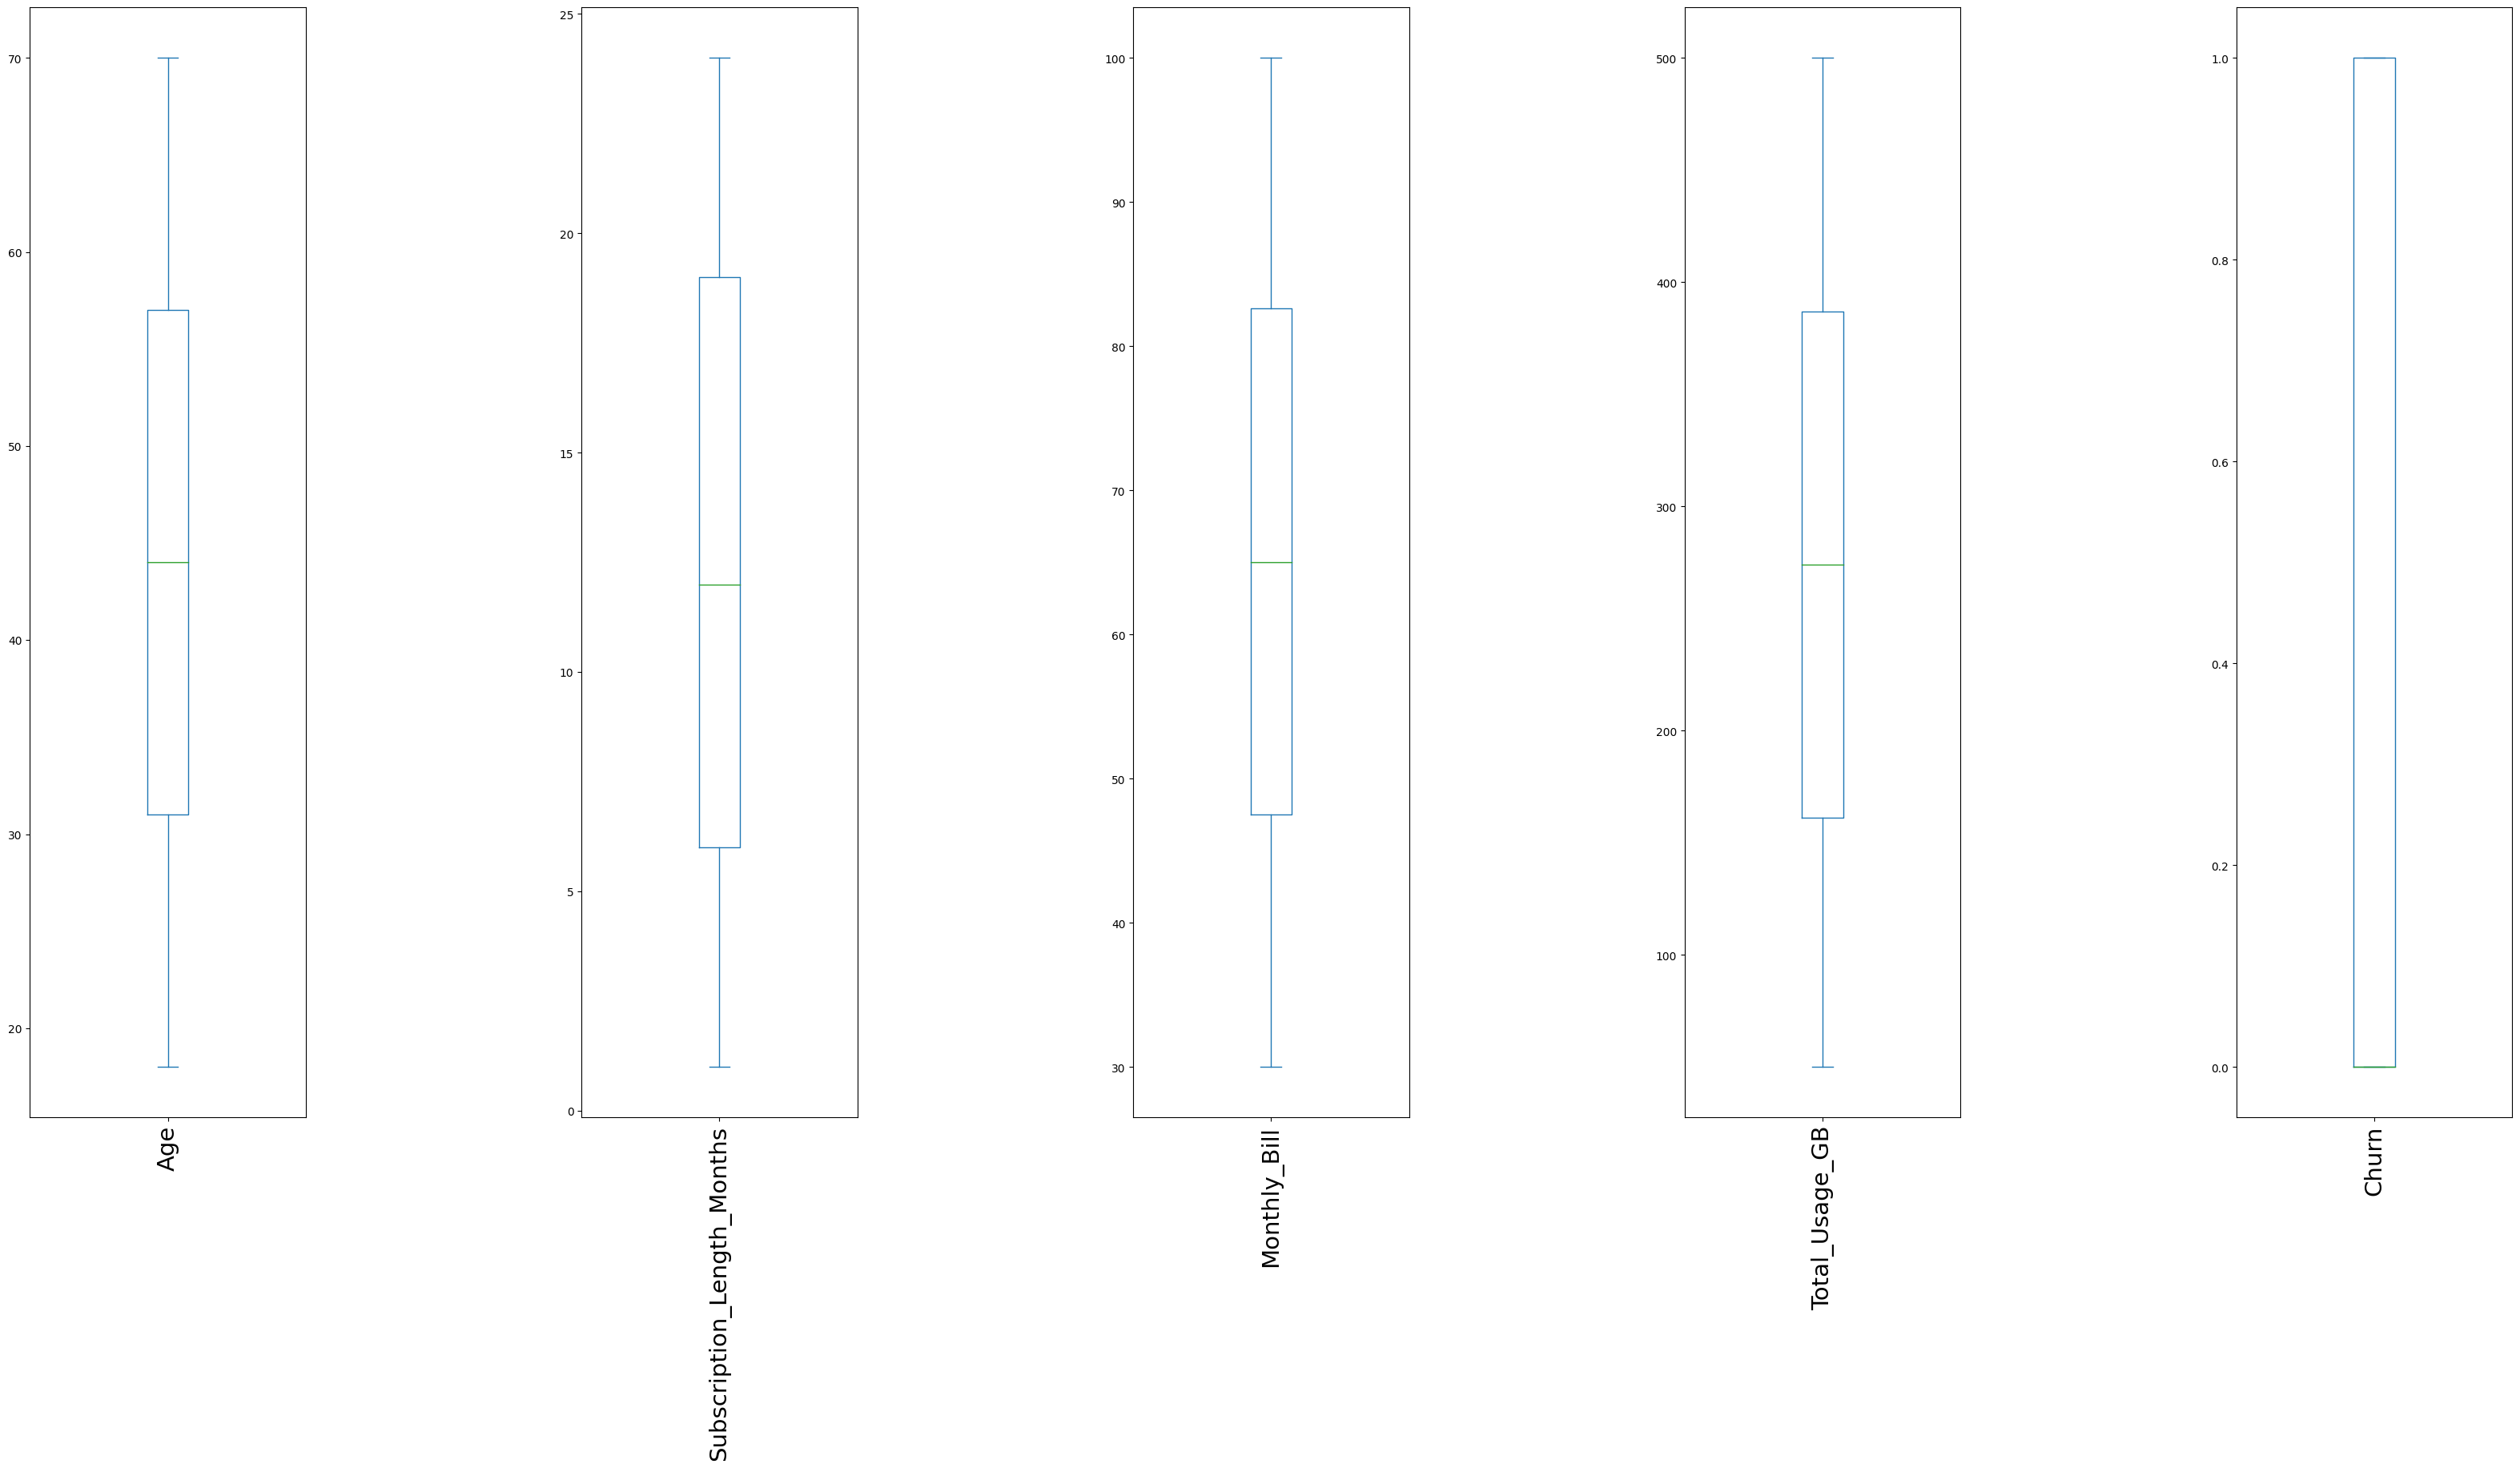

In [18]:
# Check for outliers
ax = df.plot(kind='box', subplots=True, sharey=False, figsize=(40, 18))
# Set x-axis labels rotation and fontsize for each subplot
for subplot in ax:
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=90, fontsize=21)
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=1.0)
# Show the plot
plt.show()

#### Outlier treatment not required

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Convert categorical variables into dummy variables
df1 = pd.get_dummies(df)
df1.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,0,1,0,0,1,0,0
1,62,1,48.76,172,0,1,0,0,0,0,0,1
2,24,5,85.47,460,0,1,0,0,0,1,0,0
3,36,3,97.94,297,1,1,0,0,0,0,1,0
4,46,19,58.14,266,0,1,0,0,0,0,1,0


In [21]:
# Split the data into X and y variables
X = df1.drop(columns = ['Churn'])
X

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,0,1,0,0
1,62,1,48.76,172,1,0,0,0,0,0,1
2,24,5,85.47,460,1,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,0,1,0
4,46,19,58.14,266,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,0,1,0,1,0,0,0
99996,62,19,61.65,351,1,0,0,0,0,0,1
99997,64,17,96.11,251,0,1,1,0,0,0,0
99998,51,20,49.25,434,1,0,0,0,0,0,1


In [22]:
y = df1['Churn']
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

In [23]:
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

In [24]:
X_sc

array([[0.86538462, 0.69565217, 0.61942857, ..., 1.        , 0.        ,
        0.        ],
       [0.84615385, 0.        , 0.268     , ..., 0.        , 0.        ,
        1.        ],
       [0.11538462, 0.17391304, 0.79242857, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.88461538, 0.69565217, 0.94442857, ..., 0.        , 0.        ,
        0.        ],
       [0.63461538, 0.82608696, 0.275     , ..., 0.        , 0.        ,
        1.        ],
       [0.17307692, 0.7826087 , 0.66528571, ..., 1.        , 0.        ,
        0.        ]])

In [25]:
# Split the data into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 0)

# Task 3 - Model training and Hyperparameter tuning

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51     10091
           1       0.49      0.47      0.48      9909

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
def best_model_gridsearchcv(X,y):
    models = {
        'randomforest' : {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 50, 100, 150, 200, 250],
                'criterion': ['gini', 'entropy', 'log_loss']
            }
        },
        'gaussian' : {
            'model': GaussianNB(),
            'params': {
                'var_smoothing': [1e-8, 1e-9, 1e-10]
            }
        },
        'svc': {
            'model': SVC(),
            'params': {
                'C': [0.5, 1, 1.5, 2],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                'gamma': ['scale', 'auto']
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['ginni', 'entropy', 'log_loss'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    for model_name, config in models.items():
        g =  GridSearchCV(config['model'], config['params'], cv=5)
        g.fit(X,y)
        scores.append({
            'model': model_name,
            'best_score': g.best_score_,
            'best_params': g.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_model_gridsearchcv(X_sc,y)

In [36]:
# Save the model and other necessary files

In [34]:
import pickle, joblib
pickle.dump(model, open('clf.pkl','wb'))

In [37]:
joblib.dump(scaler, 'scaler')


['scaler']